# Nonlinear Regression Model for China GDP data 
## Written by Abiola Obembe
### Date: 11-03-2020

In [1]:
# Install all required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
print("Download complete")

Download complete


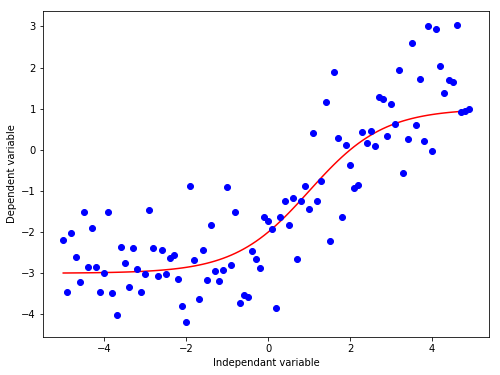

In [20]:
a = 1
b = -4
c = 3
d = 1
x = np.arange(-5,5,0.1)
y = a  + (b/ (1 + np.power(c,x-d)))
y_noise =   np.random.normal(size= x.size)
y_data = y + y_noise

plt.figure(figsize = (8,6))
plt.plot(x,y,'r')
plt.plot(x,y_data,'bo')
plt.xlabel('Independant variable')
plt.ylabel('Dependent variable')
plt.show()

In [182]:
# download dataset and displa first 10 rows
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv

df = pd.read_csv("china_gdp.csv")

xdata, ydata = (df['Year'].values , df['Value'].values)

df.head(10)

2020-03-11 05:53:53 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


In [22]:
# define two functions for nonlinear regression for comparison of accuracy

In [184]:
def sigmoid(x,Beta_1, Beta_2):
    y = 1/ (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y

In [186]:
def func(x,Beta_3,Beta_4):
    y = Beta_3 * np.power(x,Beta_4)
    return y

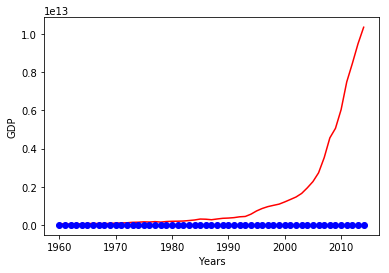

In [188]:
# Assume random values for parameters and plot against true data
Beta_1 = 0.1
Beta_2 = 1990.0
y_pred = sigmoid(xdata,Beta_1,Beta_2)

plt.plot(xdata,ydata,'r')
plt.plot(xdata,y_pred, 'bo')
plt.xlabel('Years')
plt.ylabel('GDP')
plt.show()

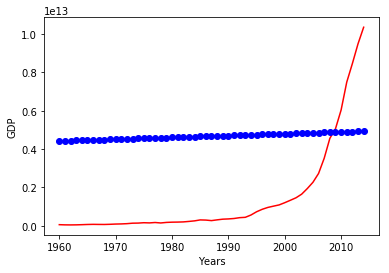

In [189]:
Beta_3 = 0.3
Beta_4 = 4

y_pred2 = func(xdata,Beta_3,Beta_4)
plt.plot(xdata,ydata,'r')
plt.plot(xdata,y_pred2, 'bo')
plt.xlabel('Years')
plt.ylabel('GDP')
plt.show()

In [202]:
# Split data to train and test set
msk    = np.random.rand(len(df)) < 0.8
xtrain = xdata[msk]
xtest  = xdata[~msk]
ytrain = ydata[msk]
ytest  = ydata[~msk]
# Normalize data
xtrain_norm = xtrain/(xtrain.max())
ytrain_norm = ytrain/(ytrain.max())

In [203]:
# Finding the best parameter for sigmoid function
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xtrain_norm,ytrain_norm)
#print the final parameters
print('Beta_1 = %f , Beta_2 =%f' % (popt[0], popt[1]))

Beta_1 = 692.770463 , Beta_2 =0.997200


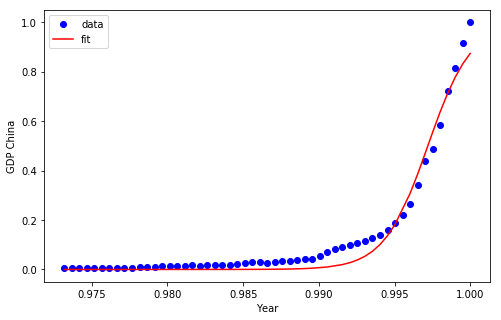

In [204]:
# plot data and regression model for optimized  sigmoid function


ytrain_1 = sigmoid(xtrain_norm,*popt)

plt.figure(figsize = (8,5))
plt.plot(xdata_norm, ydata_norm, 'bo', label = 'data')
plt.plot(xtrain_norm, ytrain_1, 'r', label = 'fit')
plt.legend(loc ='best')
plt.xlabel('Year')
plt.ylabel('GDP China')
plt.show()

In [205]:
# find the best parameters for the power function

from scipy.optimize import curve_fit
popt_2, pcov_2 = curve_fit(expfunc, xdata_norm, ydata_norm)

# print the parameters value
print("Beta_3 = %f, Beta_4 = %f"  % (popt_2[0], popt_2[1]))

Beta_3 = 1.057304, Beta_4 = 312.340973


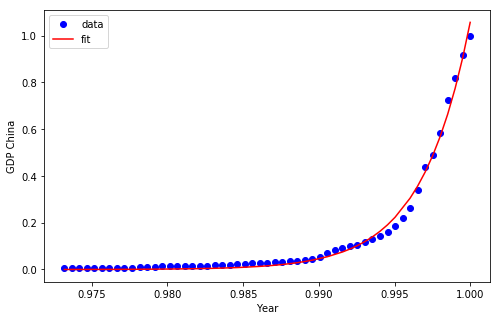

In [206]:
# plot data and regression model
ytrain_2 = expfunc(xtrain_norm, *popt_2)

plt.figure(figsize=(8,5))
plt.plot(xdata_norm, ydata_norm, 'bo', label = 'data')
plt.plot(xtrain_norm, ytrain_2, 'r', label = 'fit')
plt.legend(loc ='best')
plt.xlabel('Year')
plt.ylabel('GDP China')
plt.show()


In [210]:
# Compare both models to see which gives best performance
xtest_norm = xtest/max(xtest)
ytest_norm = ytest/max(ytest)
yhat_1 = sigmoid(xtest_norm, *popt)
yhat_2 = func(xtest_norm,*popt_2)
from sklearn.metrics import r2_score
print('The R2 score for the sigmoid function is: %.2f' % r2_score(yhat_1,ytest_norm))
print('The R2 score for the power function is: %.2f' % r2_score(yhat_2,ytest_norm))

The R2 score for the sigmoid function is: 0.89
The R2 score for the power function is: 0.96


## Outcome : Based on the result the power function/model is superior to the sigmoid model